Прочитайте csv файл (використовуйте функцію read_csv)
Виведіть перші п'ять рядків (використовується функція head)
Виведіть розміри датасету (використовуйте атрибут shape)
Про скільки книг зберігає дані датасет?

In [6]:
import pandas as pd
tab = pd.read_csv("bestsellers with categories 2.csv")
print(tab.head())
tab.shape

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


(550, 7)

Відповідь:  550

In [8]:
tab.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)



In [9]:
na_values = tab.isna().sum()
print(na_values)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Відповідь: ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
Які є унікальні жанри?

In [11]:
print(tab['genre'].unique())

['Non Fiction' 'Fiction']


Відповідь: 'Non Fiction' 'Fiction'

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

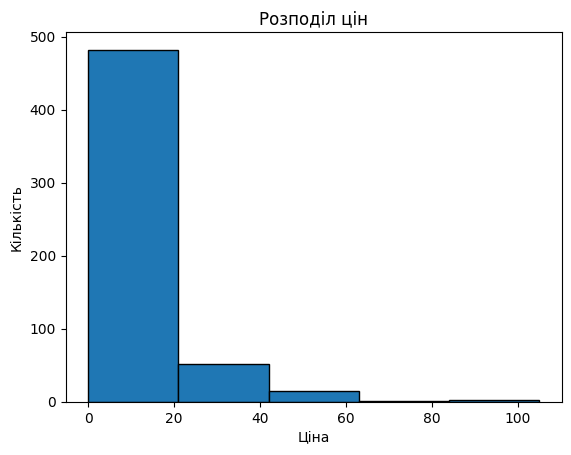

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [13]:
import matplotlib.pyplot as plt

tab['price'].plot(kind='hist', bins=5, edgecolor='black')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.title('Розподіл цін')
plt.show()

print(f"Максимальна ціна: {tab['price'].max()}")
print(f"Мінімальна ціна: {tab['price'].min()}")
print(f"Середня ціна: {tab['price'].mean()}")
print(f"Медіанна ціна: {tab['price'].median()}")


Відповідь: Максимальна ціна -105
Відповідь: Мінімальна ціна- 0
Відповідь: Середня ціна - 13.1
Відповідь: Медіанна ціна -11


Який рейтинг у датасеті найвищий?

In [14]:
tab['user_rating'].max()

4.9

Відповідь: 4.9

 Скільки книг мають такий рейтинг?

In [16]:
highest_rating = tab['user_rating'].max()
num_books = len(tab[tab['user_rating'] == highest_rating])
print(num_books)

52


Відповідь: 52


Яка книга має найбільше відгуків?

In [18]:
book = tab[tab['reviews'] == tab['reviews'].max()]['name'].iloc[0]
print(book)

Where the Crawdads Sing


Відповідь: Where the Crawdads Sing

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [23]:
top50 = (tab[(tab['year'] == 2015)].sort_values('user_rating', ascending=False)).iloc[:50]
most_expensive =(top50.sort_values('price', ascending=False)).iloc[0]['name']
print(most_expensive)

Publication Manual of the American Psychological Association, 6th Edition


Відповідь: Publication Manual of the American Psychological Association, 6th Edition

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [26]:
fiction_2010 = tab[(tab['year'] == 2010) & (tab['genre'] == 'Fiction')]
print(fiction_2010.shape[0])

20


 Відповідь: 20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [28]:
high_rating = tab[(tab['user_rating'] == 4.9) & (tab['year'].isin([2010, 2011]))]
print(high_rating.shape[0])

1


 Відповідь:1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
Відповідь: Яка книга остання у відсортованому списку?

In [30]:
sorted_books = top50[(top50['price'] < 8)].sort_values(by='price')
print(sorted_books.iloc[-1])

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


Відповідь: Old School (Diary of a Wimpy Kid #10)

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).



In [31]:
genre_prices = tab.groupby('genre')['price'].agg(['max', 'min'])
print(genre_prices)

             max  min
genre                
Fiction       82    0
Non Fiction  105    0


Відповідь: Максимальна ціна для жанру Fiction:82

Відповідь: Мінімальна ціна для жанру Fiction: 0

Відповідь: Максимальна ціна для жанру Non Fiction:105

Відповідь: Мінімальна ціна для жанру Non Fiction: 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).

Якої розмірності вийшла таблиця?

In [32]:
author = tab.groupby('author')['name'].count().reset_index()
author.columns = ['author', 'book_count']
print(author)

                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


Відповідь:248:2

Який автор має найбільше книг? Скільки книг цього автора?

In [33]:
who = author[author['book_count'] ==author['book_count'].max()]
print(who)

          author  book_count
120  Jeff Kinney          12


Відповідь:Jeff Kinney -12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
 У якого автора середній рейтинг мінімальний?

In [43]:
avg_rating = tab.groupby('author')['user_rating'].mean().reset_index()
avg_rating.columns = ['author', 'avg_rating']
min_avg = avg_rating[avg_rating['avg_rating'] == avg_rating['avg_rating'].min()]
print(min_avg['author'])


71    Donna Tartt
Name: author, dtype: object


Відповідь:Donna Tartt

Який у цього автора середній рейтинг?

In [46]:
print(min_avg['avg_rating'])

71    3.9
Name: avg_rating, dtype: float64


Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом
Який автор перший у списку?

In [48]:
combined_tab = pd.concat([author, avg_rating['avg_rating']], axis=1)
combined_tab.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True], inplace=True)
print(combined_tab)
print(combined_tab.iloc[0]['author'])


                                 author  book_count  avg_rating
171                      Muriel Barbery           1    4.000000
43                         Chris Cleave           1    4.100000
109                   Ian K. Smith M.D.           1    4.100000
186                        Pierre Dukan           1    4.100000
81                     Elizabeth Strout           1    4.200000
..                                  ...         ...         ...
11   American Psychological Association          10    4.500000
226                     Suzanne Collins          11    4.663636
92                         Gary Chapman          11    4.736364
197                        Rick Riordan          11    4.772727
120                         Jeff Kinney          12    4.800000

[248 rows x 3 columns]
Muriel Barbery



Відповідь: Muriel Barbery

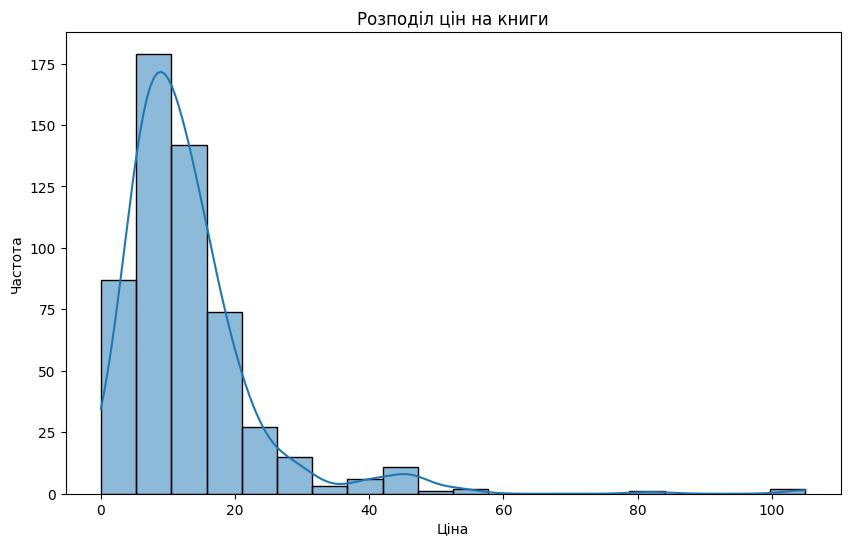

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=tab, x='price', bins=20, kde=True)
plt.title("Розподіл цін на книги")
plt.xlabel("Ціна")
plt.ylabel("Частота")
plt.show()

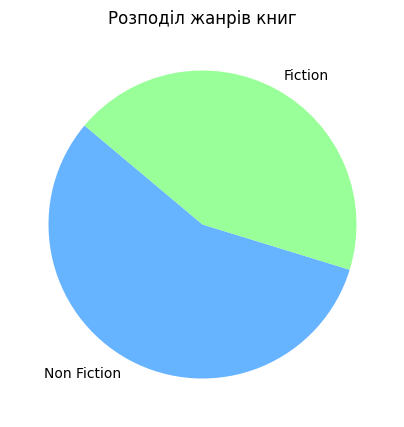

In [52]:
genre_counts = tab['genre'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(genre_counts, labels=genre_counts.index, startangle=140, colors=['#66b3ff', '#99ff99'])
plt.title("Розподіл жанрів книг")
plt.show()

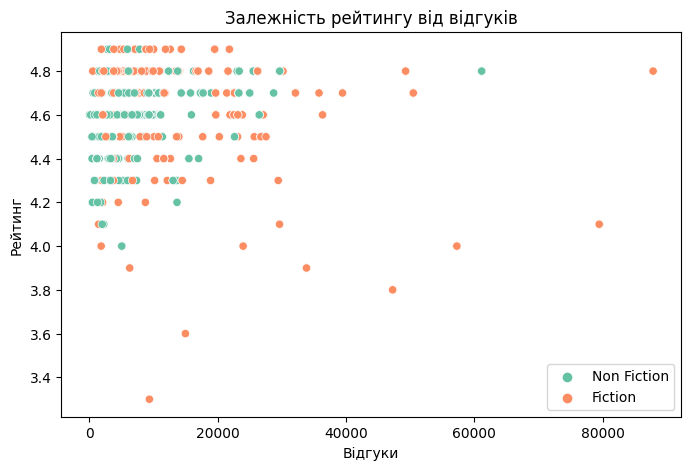

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tab, x='reviews', y='user_rating', hue='genre', palette='Set2')
plt.title("Залежність рейтингу від відгуків")
plt.xlabel("Відгуки")
plt.ylabel("Рейтинг")
plt.legend()
plt.show()

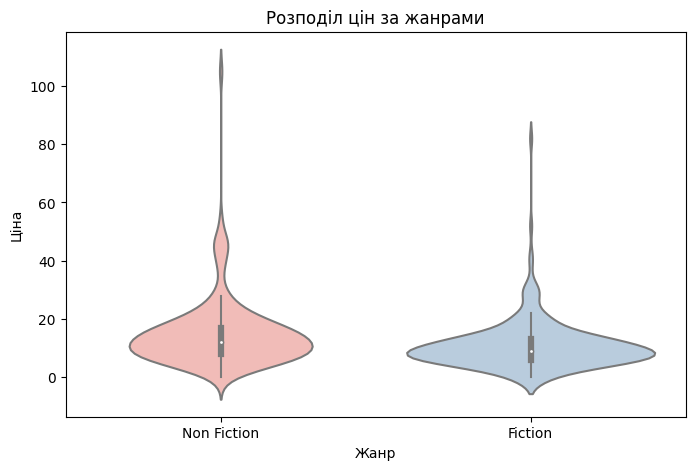

In [54]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=tab, x='genre', y='price', palette='Pastel1')
plt.title("Розподіл цін за жанрами")
plt.xlabel("Жанр")
plt.ylabel("Ціна")
plt.show()

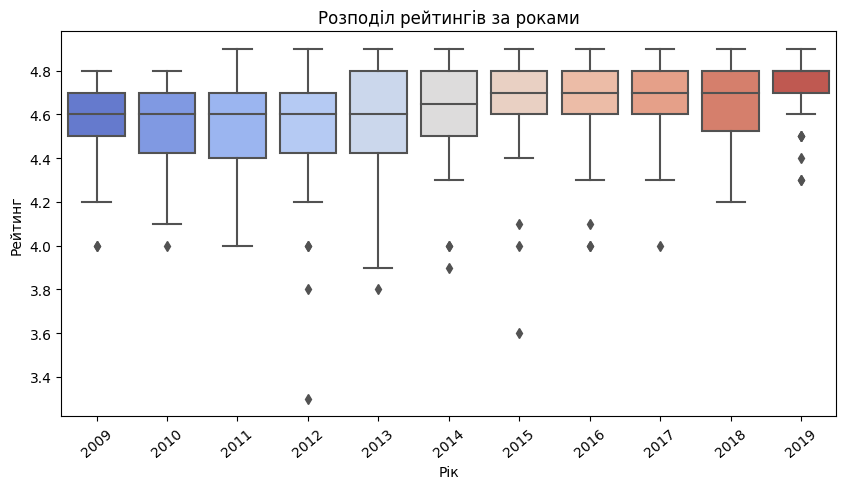

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=tab, x='year', y='user_rating', palette='coolwarm')
plt.title("Розподіл рейтингів за роками")
plt.xlabel("Рік")
plt.ylabel("Рейтинг")
plt.xticks(rotation=40)
plt.show()

